# Aula 2 - Busca não-informada e informada

Neste notebook, realizaremos a implementação de algoritmos de busca não-informada e de busca informada. Na primeira parte, veremos a implementação do algoritmo de busca não-informada chamado busca em largura. Na segunda parte, veremos a implementação do algoritmo de busca informada chamado A$^*$. Em ambos os casos, o objetivo é entender como estes algoritmos funcionam. Ao final, você deverá realizar os exercícios propostos.

## Parte 1 - busca não-informada

Abaixo, temos a implementação do algoritmo busca em largura (BFS, do inglês breadth-first search). A implementação consiste em uma função que recebe como entrada um grafo e sua raíz. Durante sua execução, o algoritmo imprime os nós na ordem em que os mesmos são visitados. 

In [ ]:
import collections

def bfs(graph, root): 
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue: 
        vertex = queue.popleft()
        print(vertex)
        for neighbour in graph[vertex]: 
            if neighbour not in visited: 
                visited.add(neighbour) 
                queue.append(neighbour) 

Para executar o algoritmo, precisamos antes criar um grafo. Para tal, considere os dois exemplos de grafos abaixo.

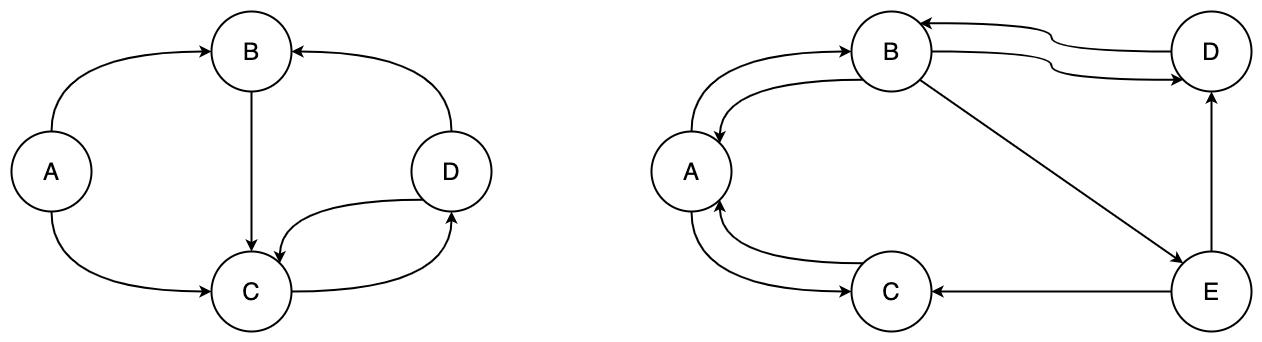

Neste notebook, representaremos um grafo através de um dicionário, onde as chaves representam os nomes dos nós e os valores representam listas de vizinhos com os quais os nós estão conectados. O código abaixo implementa os dois grafos da figura acima.

In [ ]:
graph1 = {'A': ['B', 'C'], 'B': ['C'], 'C': ['D'], 'D': ['B', 'C']} 
graph2 = {'A': ['B', 'C'], 'B': ['A', 'D', 'E'], 'C': ['A'], 'D': ['B'], 'E': ['C', 'D']}

Para testar o algoritmo, basta fazer o seguinte:

In [ ]:
print('Ordem de visitação do BFS no graph1:')
bfs(graph1, 'A')
print('Ordem de visitação do BFS no graph2:')
bfs(graph2, 'A')

Note que a topologia dos grafos permite que, ao utilizar uma busca em largura começando no nó A, os nós sejam visitados em orderm alfabética. No entanto, esta é apenas uma coincidência. No exemplo abaixo, a visita começa pelo nó D e o resultado fica bem diferente.

In [ ]:
print('Ordem de visitação do BFS no graph1:')
bfs(graph1, 'D')
print('Ordem de visitação do BFS no graph2:')
bfs(graph2, 'D')

### Exercício 1

Altere o algoritmo acima para que ele realize a busca em profundidade. Sabendo que a diferença entre o BFS e o DFS diz respeito à estrutura de dados utilizada para implementar a fila, a seguinte documentação pode lhe ser útil: https://docs.python.org/2/library/collections.html#collections.deque

In [ ]:
def dfs(graph, root): 
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue: 
        vertex = queue.pop() # now we have a LIFO queue
        print(vertex)
        for neighbour in graph[vertex]: 
            if neighbour not in visited: 
                visited.add(neighbour) 
                queue.append(neighbour) 

### Exercício 2

Crie um grafo maior (e.g., o mapa da Romênia visto em aula). Em seguida, execute os dois algoritmos acima e compare a ordem com que os nós são visitados. Qual dos dois algoritmos é melhor? Por quê?

In [ ]:
romania = {
    'Arad': ['Zerind', 'Sibiu', 'Timisoara'], 
    'Zerind': ['Arad', 'Oradea'], 
    'Sibiu': ['Arad', 'Oradea', 'Rimnicu Vilcea', 'Fagaras'], 
    'Timisoara': ['Arad', 'Lugoj'],
    'Oradea': ['Zerind', 'Sibiu'],
    'Fagaras': ['Sibiu', 'Bucharest'],
    'Lugoj': ['Timisoara', 'Mehadia'],
    'Mehadia': ['Lugoj', 'Drobeta'],
    'Drobeta': ['Mehadia', 'Craiova'],
    'Craiova': ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'],
    'Rimnicu Vilcea': ['Craiova', 'Sibiu', 'Pitesti'],
    'Pitesti': ['Craiova', 'Rimnicu Vilcea', 'Bucharest'],
    'Bucharest': ['Pitesti', 'Fagaras', 'Giurgiu', 'Urziceni'],
    'Giurgiu': ['Bucharest'],
    'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
    'Hirsova': ['Urziceni', 'Eforie'],
    'Eforie': ['Hirsova'],
    'Vaslui': ['Hirsova', 'Iasi'],
    'Iasi': ['Vaslui', 'Neamt'],
    'Neamt': ['Iasi']
}

print('Ordem de visitação do BFS no graph1:')
bfs(romania, 'Arad')
print('Ordem de visitação do DFS no graph2:')
dfs(romania, 'Arad')

(sua resposta aqui)

## Parte 2 - busca informada

Agora implementaremos o algoritmo A$^*$ para encontrar o caminho mais curto em um labirinto. Para tal, considere como exemplo o labirinto super simples abaixo, onde se pretende sair do ponto (0,0) e chegar no ponto (7,6).

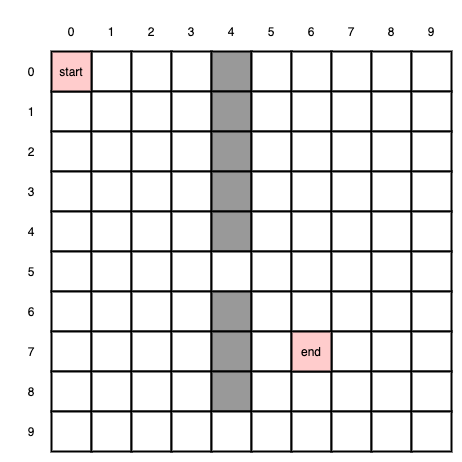


Representaremos um labirinto através de uma matriz, onde números 0 representam posições livres e números 1 representam paredes. No exemplo abaixo, criamos um labirinto simples contendo apenas uma parede na vertical com duas posições livres para permitir o trânsito entre os dois lados do labirinto.

In [ ]:
# The maze
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# Start and end positions
start = (0, 0)
end = (7, 6)

Abaixo, temos uma implementação incompleta do algoritmo A$^*$. Em nossa implementação, o algoritmo é representado pela função `astar`, que recebe uma instância do problema (matriz representando um labirinto), uma posição inicial `(x,y)`, uma posição final `(x,y)` e uma função heurística. Ao ser executada, esta função retornará uma lista de posições representando o caminho mais curto (caso ele exista) entre a posição inicial e a final. Além disso, a função também retorna o número de iterações que foram necessárias para rodar o algoritmo.

In [ ]:
# Class for representing a node (or cell) in the map
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

# A-star algorithm
def astar(maze, start, end, heuristic):
    
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    iterations = 0
    while len(open_list) > 0:
        iterations += 1

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], iterations # Return reversed path and the number of iterations to complete the algorithm

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # up, down, right, left

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            is_in_closed = False
            for closed_child in closed_list:
                if child == closed_child:
                    is_in_closed = True
                    break
            if is_in_closed:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = heuristic(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
            child.f = child.g + child.h

            # Child is already in the open list
            is_in_open = False
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    is_in_open = True
                    break
            if is_in_open:
                continue

            # Add the child to the open list
            open_list.append(child)

Note que, como descrito acima, um dos parâmetros do algoritmo é uma função heurística. Em nossa implementação, uma função heurística deve receber um par de pontos `(x1,y1)` e `(x2,y2)` e retornar a distância estimada entre eles usando uma heurística. O código abaixo apresenta um exemplo de função.

In [ ]:
def f_heuristica(x1, y1, x2, y2):
    return x1-x2 + y1-y2

Tendo definido os elementos acima, podemos agora testar o algoritmo. Para tal, basta executar o código abaixo.

In [ ]:
path = astar(maze, start, end, f_heuristica)
print(path)

Note que o algoritmo retorna uma lista de nós representando o menor caminho, que no nosso caso corresponde pode ser visualizado como abaixo.

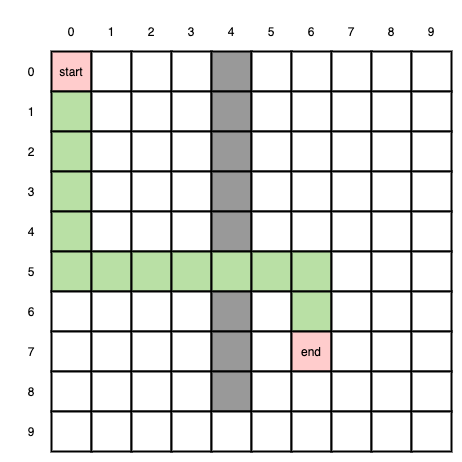

### Exercício 3

Implemente as seguintes heurísticas: distância Euclidiana e distância de Manhattan.

In [ ]:
def h_euclidiana(x1, y1, x2, y2):
  return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [ ]:
def h_manhattan(x1, y1, x2, y2):
  return abs(x2 - x1) + abs(y2 - y1)

### Exercício 4

Crie uma terceira heurística à sua escolha e coloque o seu nome.


In [ ]:
def h_fulano(x1, y1, x2, y2):
  return 0 # esta péssima heurística faz o A* não estimar o custo do nó expandido até o destino

### Exercício 5

Execute o algoritmo A$^*$ com as três heurísticas acima e compare o resultado.

In [ ]:
e, ie = astar(maze, start, end, h_euclidiana)
m, me = astar(maze, start, end, h_manhattan)
g, ge = astar(maze, start, end, h_fulano)

print('Distância Euclidiana: \n\tCaminho: %s \n\tCusto do caminho: %d\n\tIterações do algoritmo: %d' % (e, len(e), ie))
print('Distância de Manhattan: \n\tCaminho: %s \n\tCusto do caminho: %d\n\tIterações do algoritmo: %d' % (m, len(m), me))
print('Distância de fulano: \n\tCaminho: %s \n\tCusto do caminho: %d\n\tIterações do algoritmo: %d' % (g, len(g), ge))

(fim)